In [5]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [6]:
import os
import random

#folder_path = '/Users/mouam/OneDrive/Bureau/data'
folder_path = './data'
filenames = os.listdir(folder_path)
random.shuffle(filenames) # shuffle the files

In [7]:
# put in image list the shuffled card 
image_list = []
for filename in filenames:
    filepath = os.path.join(folder_path, filename)
    image = cv2.imread(filepath)
    image_list.append(image)

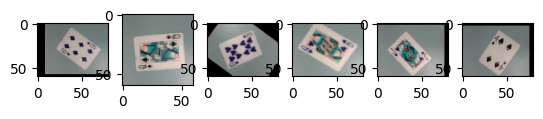

In [8]:
fig, ax = plt.subplots(1, 6) # Display 3 images
for i in range(6):
    ax[i].imshow(image_list[i])   
plt.show()

## DATA PROCESSING

In [9]:
# Get labels
def getlabel(name):
    if name == 'Ace':
        im_label = '1'
    elif name == '2':
        im_label = '2'
    elif name == '3':
        im_label = '3'
    elif name == '4':
        im_label = '4'
    elif name == '5':
        im_label = '5'
    elif name == '6':
        im_label = '6'
    elif name == '7':
        im_label = '7'
    elif name == '8':
        im_label = '8'
    elif name == '9':
        im_label = '9'
    elif name == '10':
        im_label = '10'
    elif name == 'Jack':
        im_label = '11'
    elif name == 'Queen':
        im_label = '12'
    elif name == 'King':
        im_label = '13'
    return im_label

In [10]:
label = []
for index, image in enumerate(image_list):
    # Get the filename for the current image using the index
    filename = filenames[index]
    name = filename.split("_")
    label.append(getlabel(name[0]))

In [11]:
image_data3 = []
for image in image_list:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    im_data = gray.flatten()
    
    if np.shape(im_data)[0] < 4800: 
        im_data = np.append(im_data, np.zeros(4800 - np.shape(im_data)[0]))
   
    #print(np.shape(im_data))    
    image_data3.append(im_data)

In [12]:
from sklearn.model_selection import train_test_split
    
X = image_data3
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise en forme des donnees
scaler = StandardScaler()

# Caclul moyenne et ecart-type
scaler.fit(X_train)

# Normalisation des donnees :
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [13]:
print("X_train :",np.shape(X_train))
print("X_train resized and normalized :",np.shape(X_scaled_train))

X_train : (8320, 4800)
X_train resized and normalized : (8320, 4800)


## KNN MODEL 

In [14]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 1, p = 1)
clf.fit(X_scaled_train, y_train)
y_pred = clf.predict(X_scaled_test)
knn_acc = accuracy_score(y_test, y_pred)

print ("KNN Accuracy on testing set :", knn_acc)
print ("\nConfusion Matrix:")
print (metrics.confusion_matrix(y_test, y_pred))

KNN Accuracy on testing set : 0.3889423076923077

Confusion Matrix:
[[ 89   0   2   1   2  14  20   7   6   1   0   2   3]
 [  2  46  11  25  12   2   2   0   2   3  10  10  24]
 [  1   2  61  47  42   0   0   0   0   0   0   2   1]
 [  0   6  40  73  28   0   0   0   0   0   1   1   3]
 [  0   2  43  37  80   0   0   0   0   0   1   1   2]
 [ 17   0   0   0   0 108  35   8   3   0   0   0   0]
 [ 28   0   0   0   0  36  84  11   1   5   0   0   0]
 [ 12   0   0   0   0  30  26  62  24  11   1   1   1]
 [ 16   0   0   0   0  11  23  43  39  19   5   8   1]
 [ 11   1   0   0   0  10  12  16  21  47  26   8   5]
 [  9   3   0   1   8   4   6  18  22  40  40  17   4]
 [  7   9   6   6   3   1   4   8  16  27  29  47  10]
 [  3  11  10  16  17   3   0   2   5   5  15  19  33]]


## RANDOM FOREST MODEL

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=1)
RF.fit(X_scaled_train, y_train)
y_pred = RF.predict(X_scaled_test)
RF_acc = accuracy_score(y_test, y_pred)

print ("RF Accuracy on testing set :", RF_acc)
print ("\nConfusion Matrix:")
print (metrics.confusion_matrix(y_test, y_pred))

RF Accuracy on testing set : 0.5620192307692308

Confusion Matrix:
[[ 68   0   0   2   2  16  18   4  15  12   0   6   4]
 [  0 120   1   1   2   0   0   0   0   1   1   8  15]
 [  0   5  91  39  20   0   0   0   0   0   0   1   0]
 [  0   1  48  83  19   0   0   0   0   0   0   0   1]
 [  0   6  23  16 118   0   0   0   0   0   0   0   3]
 [  5   0   0   0   0 140   7  12   0   7   0   0   0]
 [ 11   0   0   0   0  17  84  18  11  22   2   0   0]
 [  0   0   0   0   0  13   6 115   9  22   1   2   0]
 [  4   0   0   0   0   0  32  17  57  43   4   8   0]
 [  1   0   0   0   0   1   6   4  22  78  25  17   3]
 [  0   7   0   0   0   0   4   0  13  60  35  42  11]
 [  1  14   0   0   0   0   0   0   1  15  14 100  28]
 [  1  20   0   0   1   0   0   0   0   8   7  22  80]]


## SVC MODEL

In [28]:
from sklearn.svm import SVC

svc_1 = SVC(kernel='rbf', decision_function_shape='ovo')
svc_1.fit(X_scaled_train, y_train)
y_pred = svc_1.predict(X_scaled_test)
svc_1_acc = accuracy_score(y_test, y_pred)

print ("SVC 1 Accuracy on testing set :", svc_1_acc)
print ("\nConfusion Matrix:")
print (metrics.confusion_matrix(y_test, y_pred))

SVC 1 Accuracy on testing set : 0.5514423076923077

Confusion Matrix:
[[103   0   0   4   7  14  13   1   1   1   1   2   0]
 [  0 103   0   0   0   0   0   0   0   3  10  10  23]
 [  0   1  62  61  28   0   0   0   0   0   0   2   2]
 [  0   3  52  72  23   0   0   0   0   0   0   0   2]
 [  0   1  24  27 109   0   0   0   0   0   1   0   4]
 [  8   0   0   0   0 134  11  16   1   1   0   0   0]
 [ 44   0   0   0   0   8  91   6   8   7   1   0   0]
 [  2   0   0   0   0  23   4 119  13   6   1   0   0]
 [  1   0   0   0   0   3  27   7  81  30  14   2   0]
 [  1   0   0   0   0   0   9   1  31  70  37   8   0]
 [  2   9   0   0   0   0   7   1   9  46  52  35  11]
 [  0  19   1   0   0   0   0   0   1   7  28  82  35]
 [  0  16   3   4   4   0   0   0   0   5   8  30  69]]


## MLP MODEL

In [27]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 150, activation = 'relu',
                        solver = 'adam', alpha = 0.05,
                        learning_rate = 'adaptive')

mlp.fit(X_scaled_train, y_train)
y_pred = mlp.predict(X_scaled_test)
mlp_acc = accuracy_score(y_test, y_pred)

print ("MLP Accuracy on testing set :", mlp_acc)
print ("\nConfusion Matrix:")
print (metrics.confusion_matrix(y_test, y_pred))

MLP Accuracy on testing set : 0.5774038461538461

Confusion Matrix:
[[112   0   1   0   1   8  18   1   1   0   0   5   0]
 [  0  82   3  15   8   0   0   0   0   2   6  13  20]
 [  0   2  69  58  20   0   0   0   0   0   0   2   5]
 [  0   5  40  82  17   0   0   0   0   0   0   2   6]
 [  0  14  15  24  83   0   0   0   0   0   0   5  25]
 [ 10   0   0   0   0 135   6  15   4   0   1   0   0]
 [ 12   0   0   0   0   3 122   4  15   8   1   0   0]
 [  0   0   0   0   0  25   9 121  12   1   0   0   0]
 [  0   1   0   0   0   1  23   2  93  39   5   1   0]
 [  0   1   0   0   0   0  10   1  25  97  19   3   1]
 [  1   4   0   0   2   0   4   1  10  37  57  45  11]
 [  5  11   0   3   4   0   0   0   0   9  29  90  22]
 [  0  12   8  10  21   0   0   0   0   0   9  21  58]]


## MLP Hyperparameters Optimisations

**Do not run again** : we use GridSearchCV to search for the best paramaters in MLP model, about 5 hrs to run.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp, param_grid, n_jobs= -1, cv=5)
grid.fit(X_scaled_train, y_train)

print(grid.best_params_) 

In [96]:
print(grid.best_params_) 

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 150, 'solver': 'adam'}


## KNN Hyperparameters Optimisations

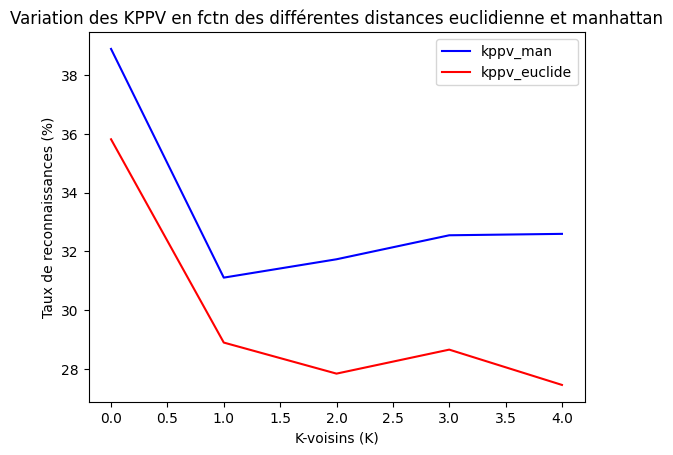

In [38]:
from sklearn.metrics import confusion_matrix

# Euclide
def varkppv_euc(n):
    classifier = KNeighborsClassifier(n_neighbors = n, p = 2)
    classifier.fit(X_scaled_train,y_train)
    y_pred = classifier.predict(X_scaled_test)
    C = confusion_matrix(y_test,y_pred)
    return np.sum(np.diag(C))/np.sum(C)*100

# Manhattan 
def varkppv_man(n):
    classifier = KNeighborsClassifier(n_neighbors = n, p = 1)
    classifier.fit(X_scaled_train, y_train)
    y_pred = classifier.predict(X_scaled_test)
    C = confusion_matrix(y_test, y_pred)
    return np.sum(np.diag(C))/np.sum(C)*100

# Affichage des courbes de Variations KPPV en fctn des différentes distances euclidienne et manhattan  
kppv_euclide = []
kppv_man = []
for i in range(1,6):
    kppv_euclide.append(varkppv_euc(i))
    kppv_man.append(varkppv_man(i))
    
plt.plot(kppv_man,'b', label = "kppv_man") 
plt.plot(kppv_euclide,'r', label = "kppv_euclide") 
plt.title("Variation des KPPV en fctn des différentes distances euclidienne et manhattan")
plt.xlabel("K-voisins (K)")
plt.ylabel("Taux de reconnaissances (%)")
plt.legend()
plt.show()

## SVC + SIFT Optimisations

Optimisation of the SVC Model with Sift Feature extractions.
we will reduce the dataset to 1000 images because the shape of the feature extraction is too big.

In [17]:
from sklearn.metrics import accuracy_score
import seaborn as sns

# Training and evaluating
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    clf_acc = accuracy_score(y_test, y_pred)
    
    print ("Accuracy on testing set:")
    print (clf_acc)

    print ("\nClassification Report:")
    print (metrics.classification_report(y_test, y_pred))
    
    print ("Confusion Matrix:")
    C = np.array(metrics.confusion_matrix(y_test, y_pred))
    sns.heatmap(C, annot=True, cmap='Blues')

In [18]:
# Get features based on SIFT features
def getSIFTfeatures(input_img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Create a sift object
    sift = cv2.SIFT_create()

    # Create keypoints for every pixel in the image
    height, width = gray.shape
    keypoints = [cv2.KeyPoint(x, y, 10) for y in range(height) for x in range(width)]
    
    # Convert keypoints to a list of points
    points = cv2.KeyPoint_convert(keypoints)

    # Compute descriptor vectors for the keypoints
    _, descriptors = sift.compute(gray, keypoints)

    return points, descriptors

In [19]:
image_data = []
for image in image_list[:2000]:
    im_feature = getSIFTfeatures(image)[1]
    im_data = im_feature.flatten()
    
    if np.shape(im_data)[0] < 614400: 
        im_data = np.append(im_data, np.zeros(614400 - np.shape(im_data)[0]))
    
    image_data.append(im_data)
    
print("shape of image_data :",np.shape(image_data))

shape of image_data : (2000, 614400)


In [20]:
from sklearn.model_selection import train_test_split

X1 = image_data[:2000]
y1 = label[:2000]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
print("X_train1 :",np.shape(X_train1))

X_train1 : (1600, 614400)


In [21]:
from sklearn.svm import SVC

# different machine learning algrithom
svc_2 = SVC(kernel='linear', decision_function_shape='ovo')
svc_2.fit(X_train1, y_train1)
y_pred1 = svc_2.predict(X_test1)
svc_2_acc = accuracy_score(y_test1, y_pred1)

print ("SVC 2 + SIFT Accuracy on testing set :", svc_2_acc)
print ("\nClassification Report :", metrics.classification_report(y_test1, y_pred1))

Accuracy on testing set : 0.735

Classification Report :               precision    recall  f1-score   support

           1       0.75      0.81      0.78        26
          10       0.82      0.97      0.89        37
          11       0.61      0.65      0.62        31
          12       0.64      0.73      0.68        22
          13       0.72      0.55      0.62        33
           2       0.93      0.81      0.87        32
           3       0.93      0.86      0.89        29
           4       0.97      0.95      0.96        37
           5       0.69      0.74      0.71        27
           6       0.67      0.55      0.60        33
           7       0.51      0.61      0.56        31
           8       0.72      0.51      0.60        35
           9       0.61      0.81      0.70        27

    accuracy                           0.73       400
   macro avg       0.74      0.73      0.73       400
weighted avg       0.74      0.73      0.73       400



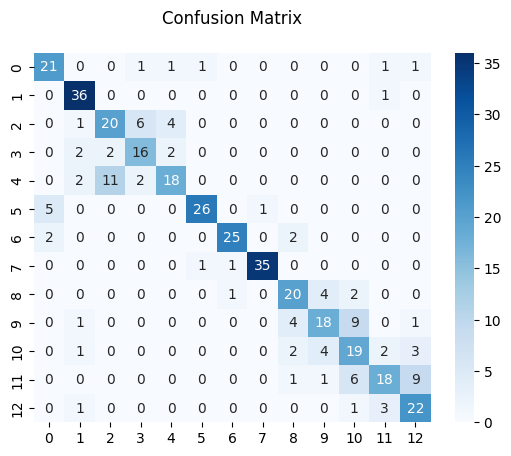

In [37]:
C = np.array(metrics.confusion_matrix(y_test1, y_pred1))

sns.heatmap(C, annot=True, cmap='Blues')
plt.title('Confusion Matrix\n')
plt.show()

In [30]:
import pandas as pd

# initialize data of lists.
data_acc = {'Models' : ['KNN', 'RF', 'SVC_1', 'MLP', 'SVC_2_SIFT'],
        'Accuracy': [knn_acc, RF_acc, svc_1_acc, mlp_acc, svc_2_acc]}

# Create DataFrame
df = pd.DataFrame(data_acc)
df

,Models,Accuracy
0,KNN,0.388942
1,RF,0.562019
2,SVC_1,0.551442
3,MLP,0.577404
4,SVC_2_SIFT,0.735000


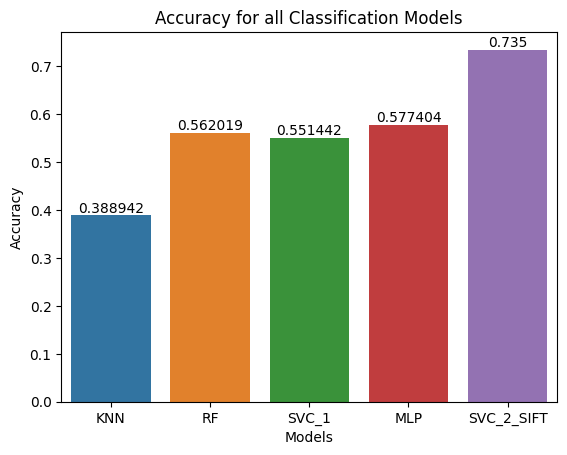

In [31]:
ax = sns.barplot(x="Models", y="Accuracy", data=df)
ax.bar_label(ax.containers[0])

plt.title('Accuracy for all Classification Models')
plt.xlabel("Models", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.show()